# Clustered data overview

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [2]:
import pandas as pd

CLUSTERED_DATA_DIR = 'data/combined/clustered/final'

In [3]:
STUDY = 'Galson_2015a'

In [4]:
# Parameters
STUDY = "Galson_2015a"


In [5]:
data = pd.read_parquet(f'{CLUSTERED_DATA_DIR}/{STUDY}.parquet')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14738476 entries, 0 to 24
Data columns (total 26 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Size           int64 
 21  Species        object
 22  Vaccine        object
 23  Subject        object
 24  cdr3_len       int64 
 25  Cluster_ID     int64 
dtypes: int64(6), object(20)
memory usage: 3.0+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Disease,Link,BSource,BType,Size,Species,Vaccine,Subject,cdr3_len,Cluster_ID
0,2,1,25814,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,127395,"[('70', 'Q'), ('103', 'L')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
1,1,8,29478,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,125855,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
2,1,12,31543,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,109459,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
3,1,1,38523,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGLDH,128305,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
4,1,1,50198,SVRVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,125829,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1


## Data overview

### Size

In [6]:
from bin.build_clustered_data import CLUSTER_ID_COLUMN_NAME

def size_overview(df):
    print(f'Total number of sequences: {df.shape[0]:,}')
    print(f'Total number of clusters: {df[CLUSTER_ID_COLUMN_NAME].nunique():,}')

In [7]:
size_overview(data)

Total number of sequences: 14,738,476


Total number of clusters: 5,698,104


In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

CLUSTER_SIZE_COL_NAME = 'Number of sequences'
CLUSTER_SIZE_PLOT_TITLE = 'Cluster sizes (using log values)'
CLUSTER_SIZE_PLOT_YLABEL = 'Cluster size'
LARGEST_CLUSTERS_CNT = 10

def cluster_size_overview(df_cluster_sizes):
    df_log_cluster_sizes = np.log(df_cluster_sizes + 1)
    sorted_df_log_cluster_sizes = df_log_cluster_sizes.sort_values().reset_index(name=CLUSTER_SIZE_COL_NAME)

    # Largest clusters
    print(f'{LARGEST_CLUSTERS_CNT} largest cluster sizes:')
    print(df_cluster_sizes.sort_values().reset_index(name=CLUSTER_SIZE_COL_NAME).tail(LARGEST_CLUSTERS_CNT).iloc[::-1].to_string(index=False))

    # Distplot
    plt.figure(figsize=(10,6))
    ax = sns.distplot(df_log_cluster_sizes.values, bins=np.arange(df_log_cluster_sizes.min(), df_log_cluster_sizes.max() + 1), kde_kws={'bw': 1})
    ax.set(title=CLUSTER_SIZE_PLOT_TITLE + ' - distribution',
           xlabel= CLUSTER_SIZE_PLOT_YLABEL,
           xticklabels=['{:.2f}'.format(np.exp(v) - 1) for v in ax.get_xticks()])
    plt.show()
    
    # Areaplot
    ax = sorted_df_log_cluster_sizes[CLUSTER_SIZE_COL_NAME].plot.area(figsize=(10,6))
    ax.set(title=CLUSTER_SIZE_PLOT_TITLE, xlabel= 'Cluster', ylabel=CLUSTER_SIZE_PLOT_YLABEL, xticks=[],
           yticklabels=['{:.2f}'.format(np.exp(v) - 1) for v in ax.get_yticks()])

10 largest cluster sizes:


 Cluster_ID  Number of sequences
    4126514                72447
    3648076                49122
     242015                47585
    4149939                33367
     125583                26613
     242016                21196
    2359625                18009
    5613395                17833
    2538750                14717
      86700                14460


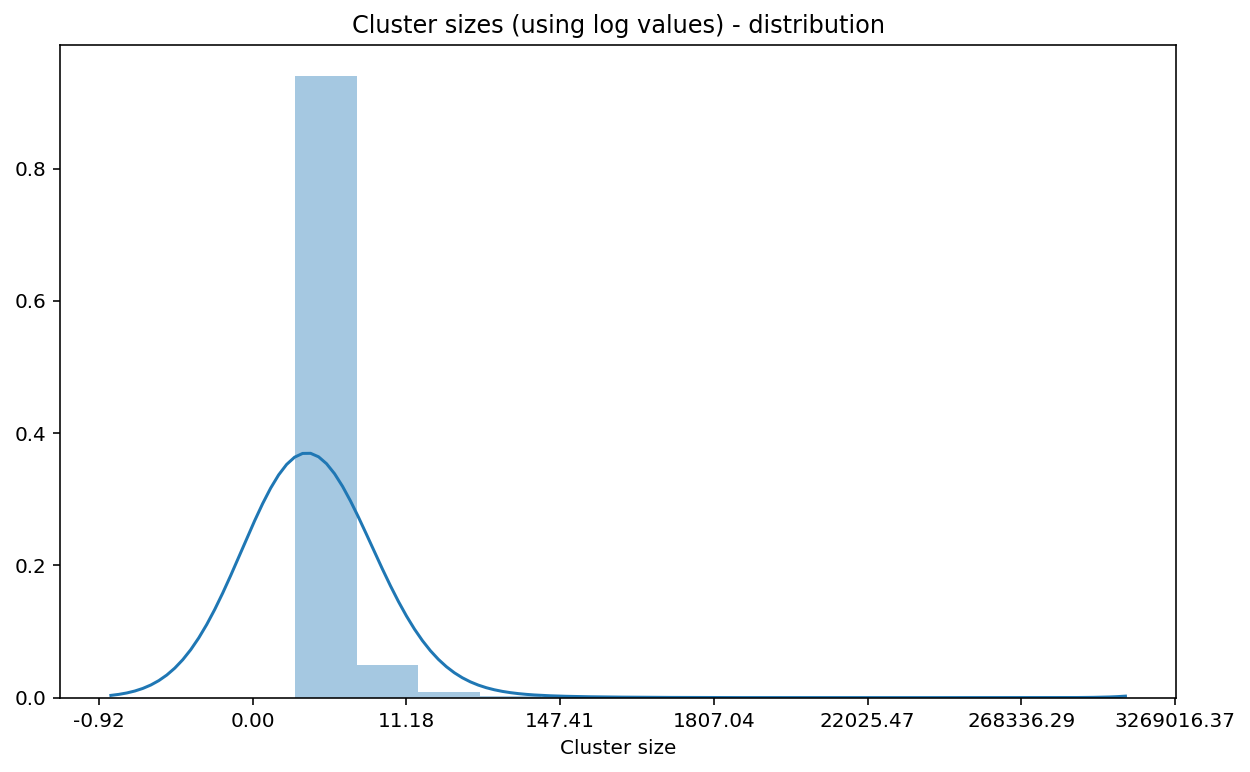

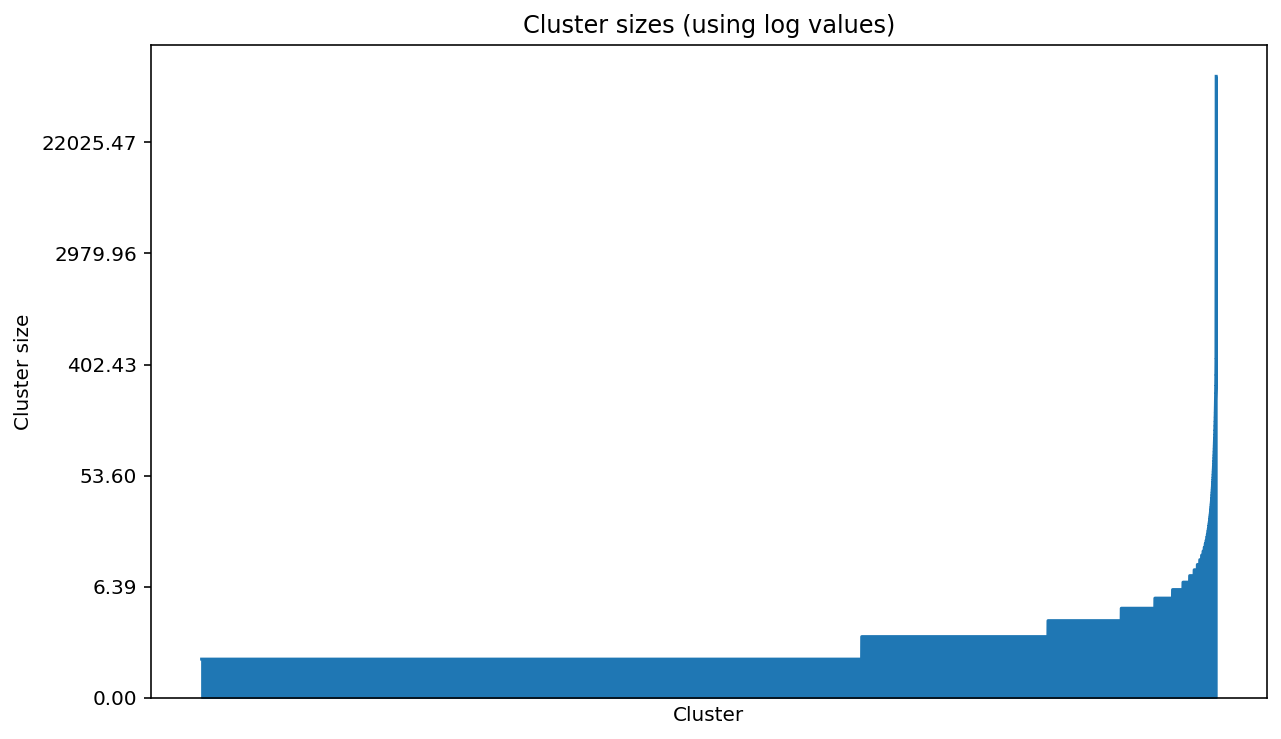

In [9]:
clusters_gr = data.groupby(CLUSTER_ID_COLUMN_NAME)
cluster_sizes = clusters_gr.size()
cluster_size_overview(cluster_sizes)

### Subject counts

In [10]:
cluster_subj_cnt = clusters_gr['Subject'].nunique()
cluster_subj_cnt

Cluster_ID
0          1
1          1
2          2
3          1
4          1
          ..
5698099    1
5698100    1
5698101    1
5698102    1
5698103    1
Name: Subject, Length: 5698104, dtype: int64

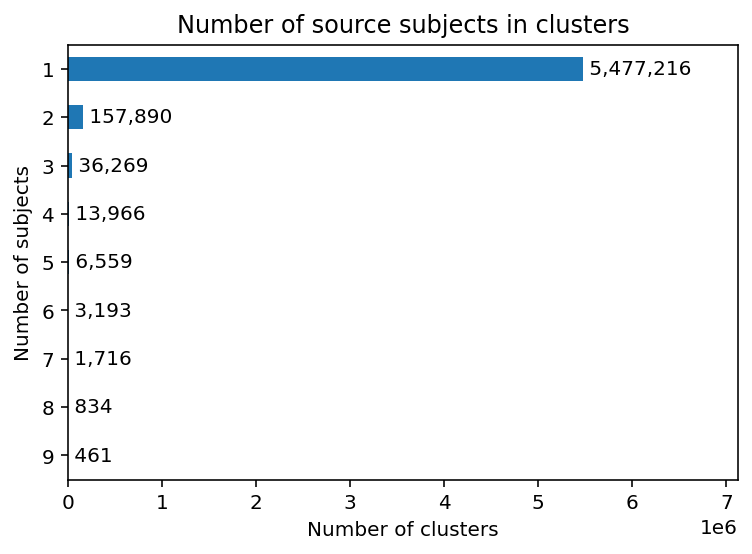

In [11]:
from bin.plotting import barplot

ax=barplot(cluster_subj_cnt.value_counts(), title='Number of source subjects in clusters')
ax.set(ylabel='Number of subjects', xlabel='Number of clusters');

### CDR3 logos of the largest clusters

In [12]:
HEBP_TYPE = 'HepB+B-cells'

clusters_specif = clusters_gr.apply(lambda gr: (gr['BType'] == HEBP_TYPE).sum() / len(gr))

In [13]:
import matplotlib.pyplot as plt
import logomaker as lm
import math

LOGOS_CLUSTER_CNT = 10
NCOLS = 2
HEP_B_RATIO_THRESHOLD = 0.5

def cdr3_logos(cluster_ids, mark_hepb=False):
    nrows = math.ceil(len(cluster_ids) / NCOLS)
    
    fig, axs = plt.subplots(nrows, NCOLS, figsize=(10, 8))
    
    for cluster_id, ax in zip(cluster_ids, axs.flat):
        cluster_data = data[data[CLUSTER_ID_COLUMN_NAME] == cluster_id]
        cluster_cdr3_sequences = cluster_data['cdr3'].values
        
        counts_mat = lm.alignment_to_matrix(cluster_cdr3_sequences)

        logo = lm.Logo(counts_mat, color_scheme='chemistry', ax=ax)
        subjects_cnt = len(cluster_data.groupby(['Author', 'Subject']))
        
        title = f'CDR3 - cluster {cluster_id}. Size={cluster_sizes[cluster_id]:,}\nHepB_spec.={"{:.3f}".format(clusters_specif[cluster_id])} - from {subjects_cnt} subjects'
        fontweight = 'bold' if mark_hepb and clusters_specif[cluster_id] > HEP_B_RATIO_THRESHOLD else 'normal'

        ax.set_title(title, fontweight=fontweight)

    fig.tight_layout()

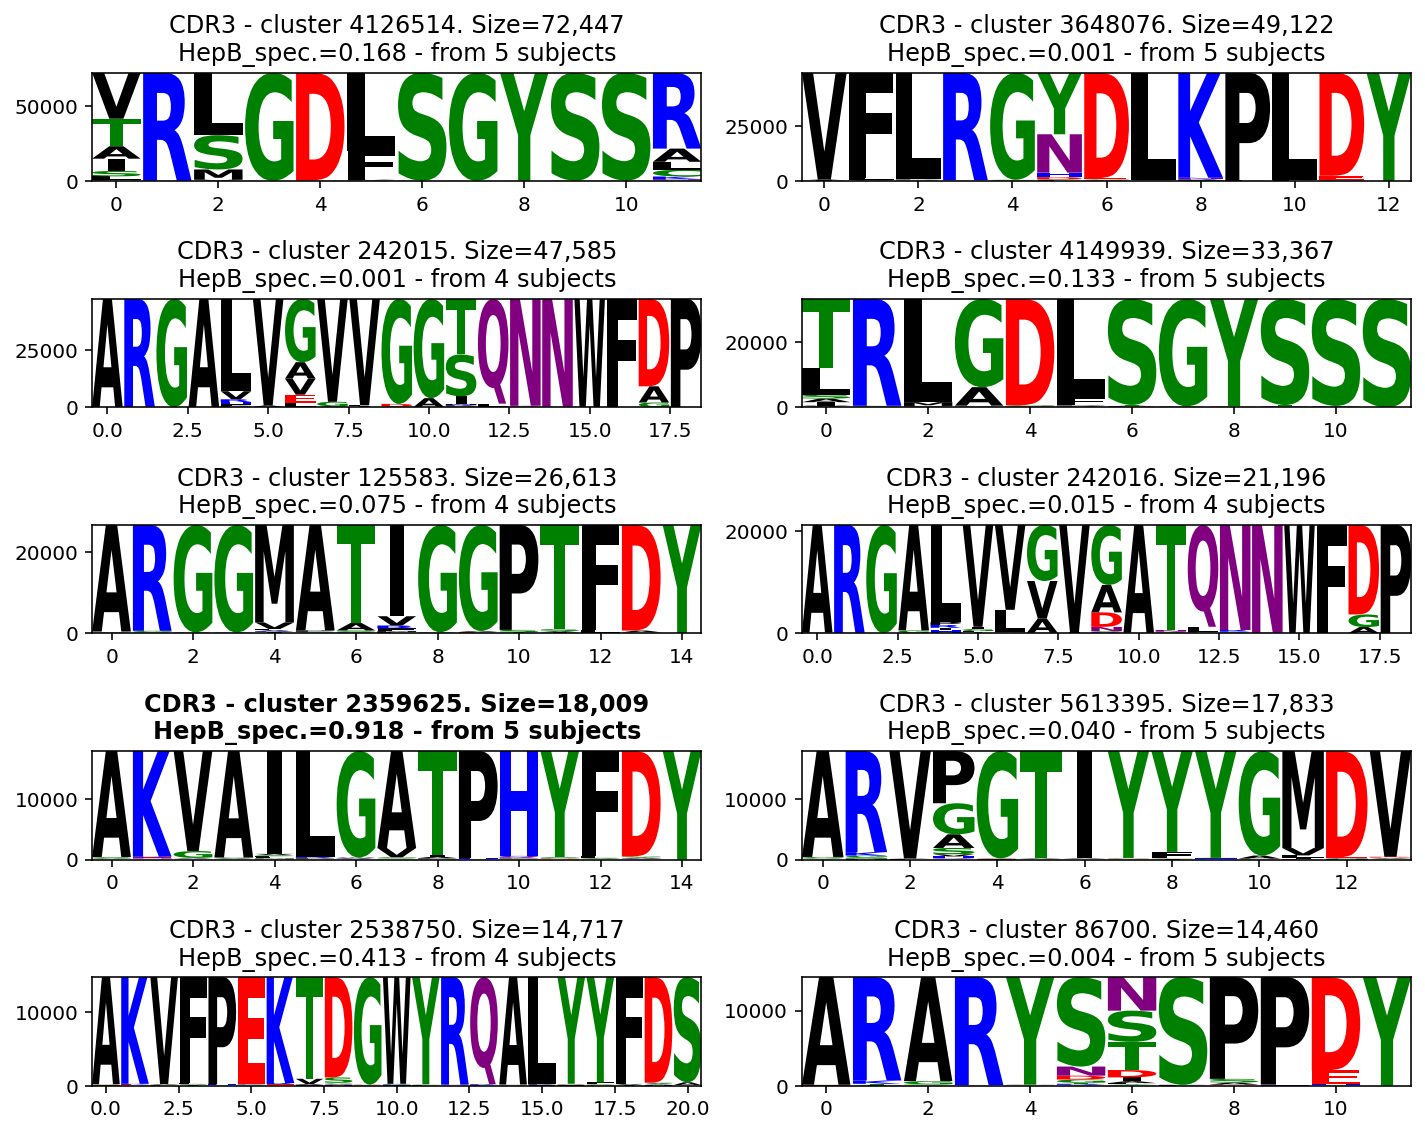

In [14]:
largest_clusters = cluster_sizes.sort_values(ascending=False).head(LOGOS_CLUSTER_CNT).index.to_list()
cdr3_logos(largest_clusters, mark_hepb=True)

### CDR3 logos of the clusters with most subjects

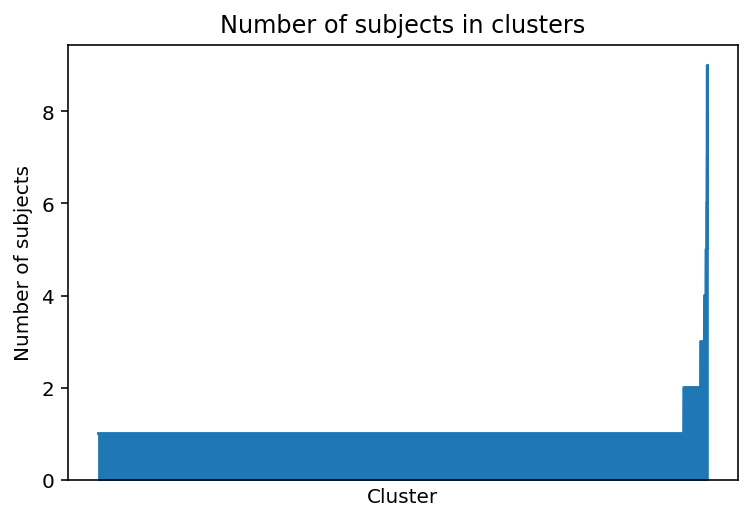

In [15]:
clusters_sorted_subj = cluster_subj_cnt.sort_values()

ax = clusters_sorted_subj.reset_index(drop=True).plot.area()
ax.set(title='Number of subjects in clusters', xlabel='Cluster', ylabel='Number of subjects', xticks=[]);

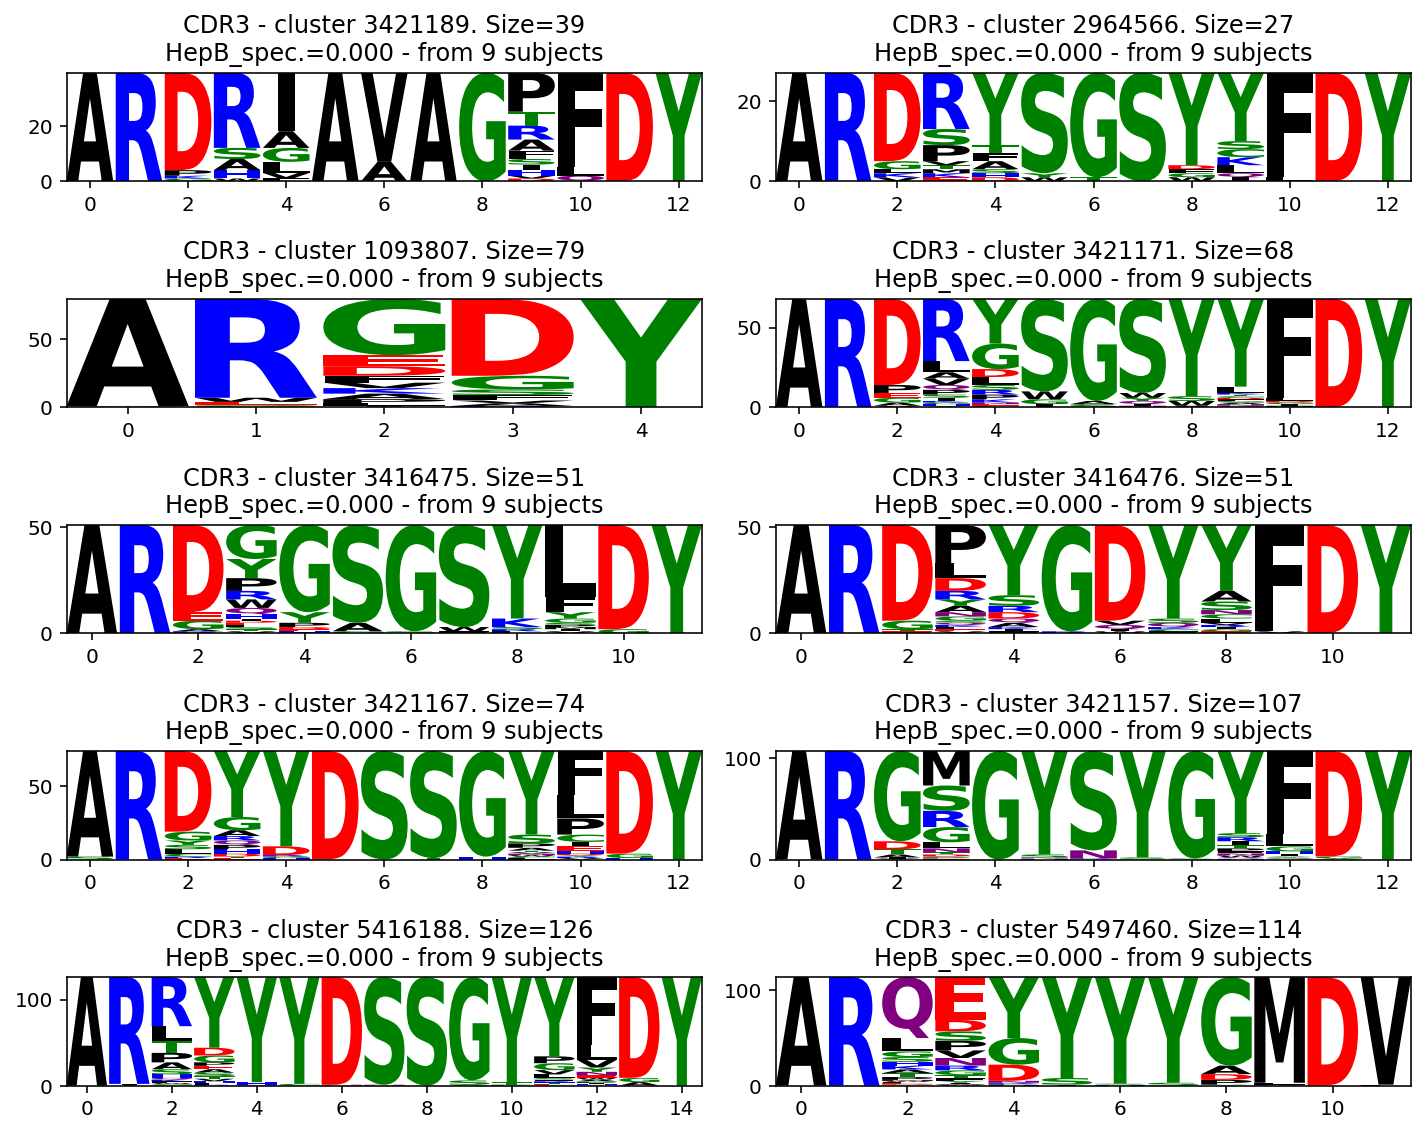

In [16]:
cdr3_logos(clusters_sorted_subj.tail(LOGOS_CLUSTER_CNT).index)

## HepB data overview

### HepB ratio

In [17]:
RATIO_SIZE_TITLE = 'Cluster HepB ratio'

def cluster_hepb_ratio_overview(specif):
    sorted_specif = specif.sort_values()

    ax = sorted_specif.reset_index().iloc[:,1].plot.area()
    ax.set(title=RATIO_SIZE_TITLE, xlabel='Cluster', ylabel='HepB ratio' , xticks=[])
    plt.show()

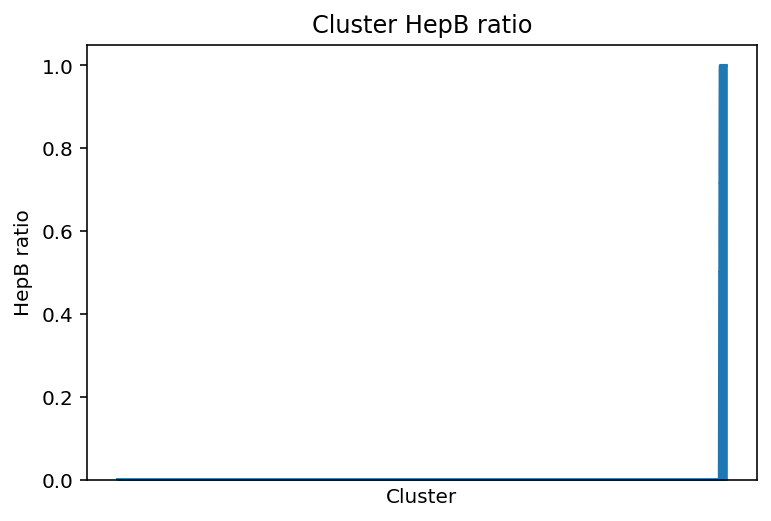

In [18]:
cluster_hepb_ratio_overview(clusters_specif)

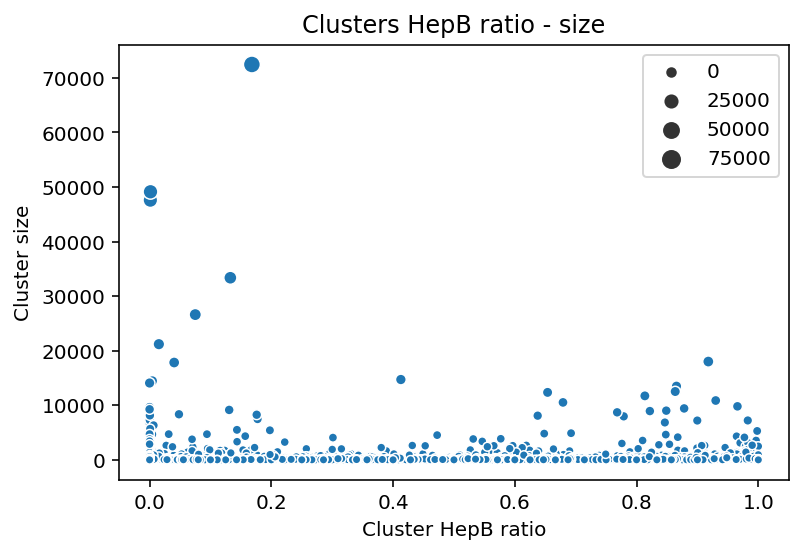

In [19]:
ax = sns.scatterplot(x=clusters_specif, y=cluster_sizes, size=cluster_sizes)
ax.set(title='Clusters HepB ratio - size', xlabel='Cluster HepB ratio', ylabel='Cluster size')
plt.show()

### HepB data

In [20]:
hepb_clusters_ids = clusters_specif[clusters_specif > HEP_B_RATIO_THRESHOLD].index.to_list()

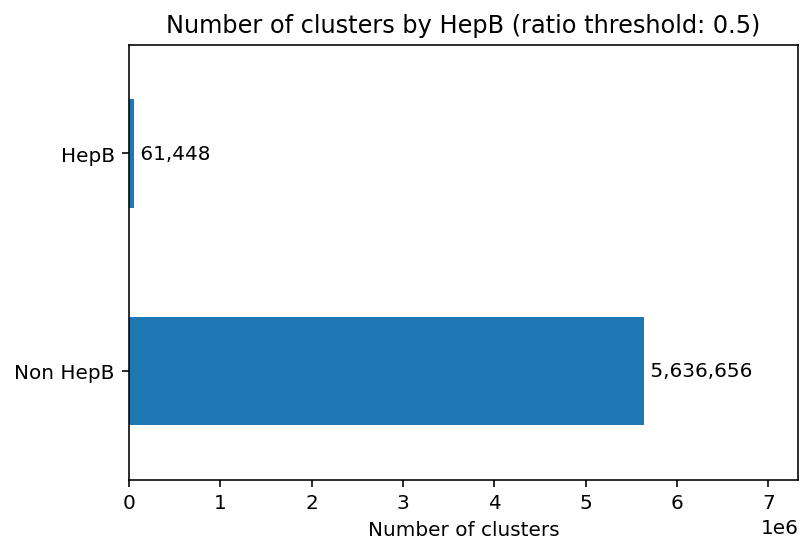

In [21]:
cluster_sizes_by_hepb = pd.Series([len(hepb_clusters_ids), len(clusters_specif) - len(hepb_clusters_ids)], index=['HepB', 'Non HepB'])
ax = barplot(cluster_sizes_by_hepb, title=f'Number of clusters by HepB (ratio threshold: {HEP_B_RATIO_THRESHOLD})');
ax.set(xlabel='Number of clusters');

### HepB cluster sizes

10 largest cluster sizes:
 Cluster_ID  Number of sequences
    2359625                18009
    2542003                13495
    2706174                12520
    3800833                12361
    5247076                11722
    1635641                10871
    3293951                10524
    2393430                 9803
      19026                 9421
    4444380                 9013


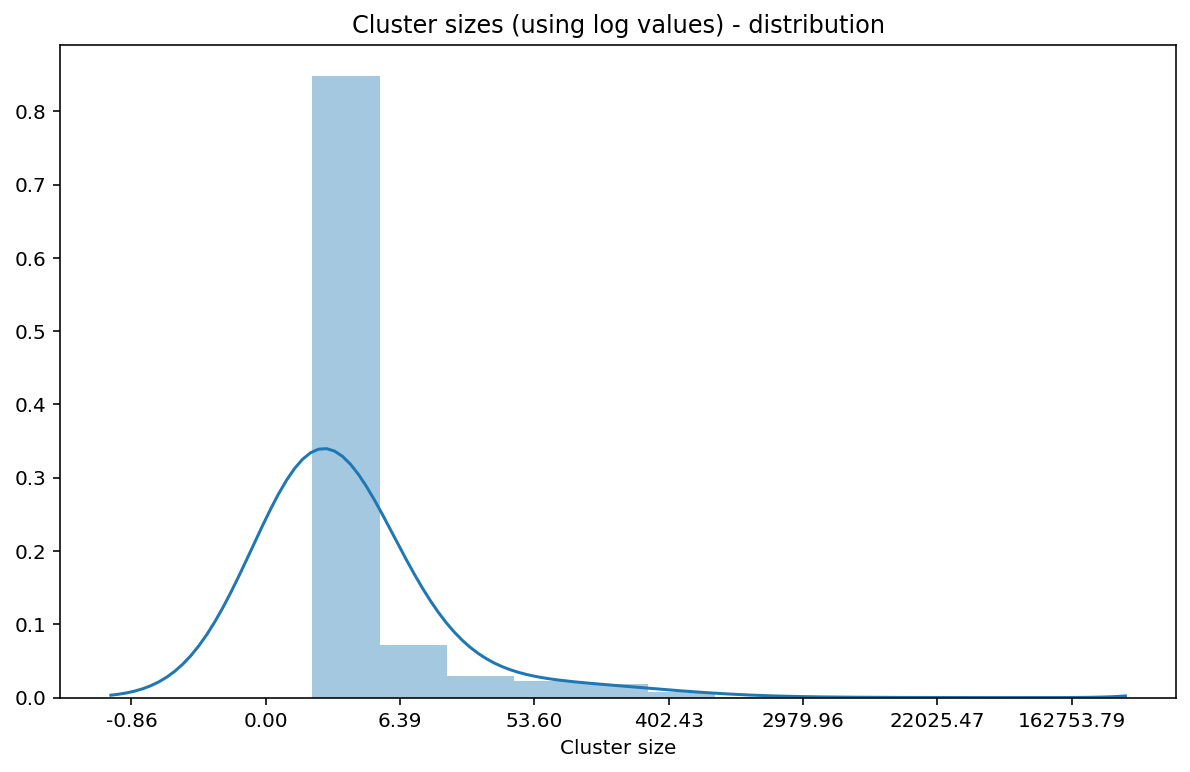

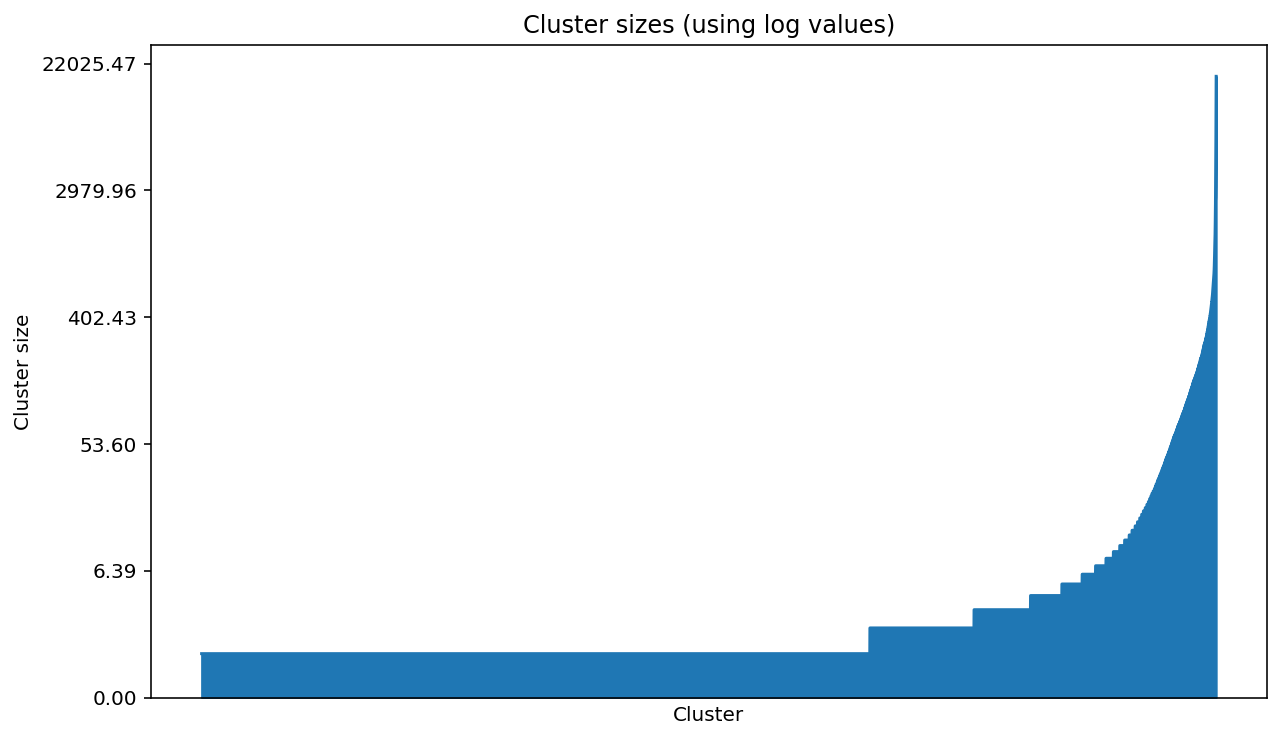

In [22]:
cluster_size_overview(cluster_sizes[hepb_clusters_ids])

### HepB subject counts

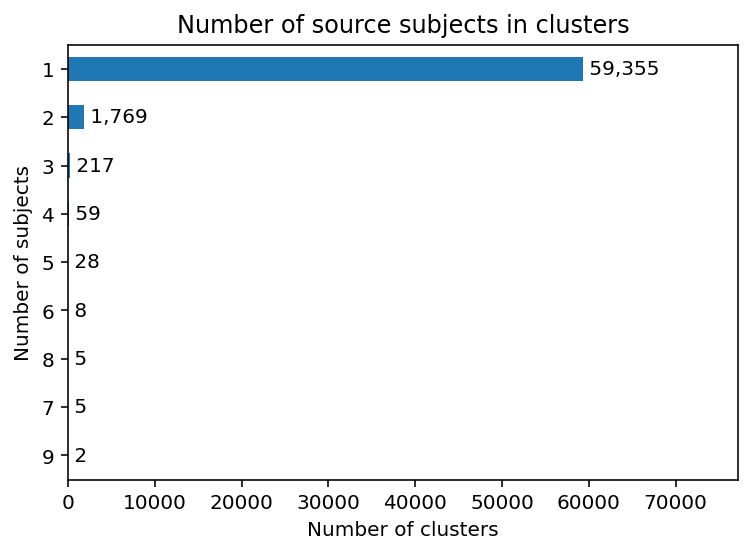

In [23]:
ax=barplot(cluster_subj_cnt.iloc[hepb_clusters_ids].value_counts(), title='Number of source subjects in clusters')
ax.set(ylabel='Number of subjects', xlabel='Number of clusters');

### HepB CDR3 logos

In [24]:
hepb_clusters_df = pd.DataFrame({
    'Size': cluster_sizes,
    'HepB ratio': clusters_specif,
    'HepB seq. count': clusters_specif * cluster_sizes
})

sorted_hepb_clusters_df = hepb_clusters_df.sort_values(by='HepB seq. count', ascending=False)
sorted_hepb_clusters_df.head(10)

,Size,HepB ratio,HepB seq. count
Cluster_ID,,,
2359625,18009,0.917874,16530.0
4126514,72447,0.168068,12176.0
2542003,13495,0.865580,11681.0
2706174,12520,0.863498,10811.0
1635641,10871,0.929997,10110.0
5247076,11722,0.813598,9537.0
2393430,9803,0.965725,9467.0
19026,9421,0.878145,8273.0
3800833,12361,0.653831,8082.0


In [25]:
HEP_B_RATIO_THRESHOLD = 0.95

best_hepb_clusters = sorted_hepb_clusters_df[sorted_hepb_clusters_df['HepB ratio'] > HEP_B_RATIO_THRESHOLD].head(LOGOS_CLUSTER_CNT)
best_hepb_clusters

,Size,HepB ratio,HepB seq. count
Cluster_ID,,,
2393430,9803,0.965725,9467.0
2538751,7217,0.982680,7092.0
4070962,5291,0.998110,5281.0
197052,4317,0.964327,4163.0
4432773,4118,0.977173,4024.0
2154914,3556,0.996344,3543.0
4017689,3121,0.983018,3068.0
2159783,3113,0.970125,3020.0
5598376,2673,0.989899,2646.0


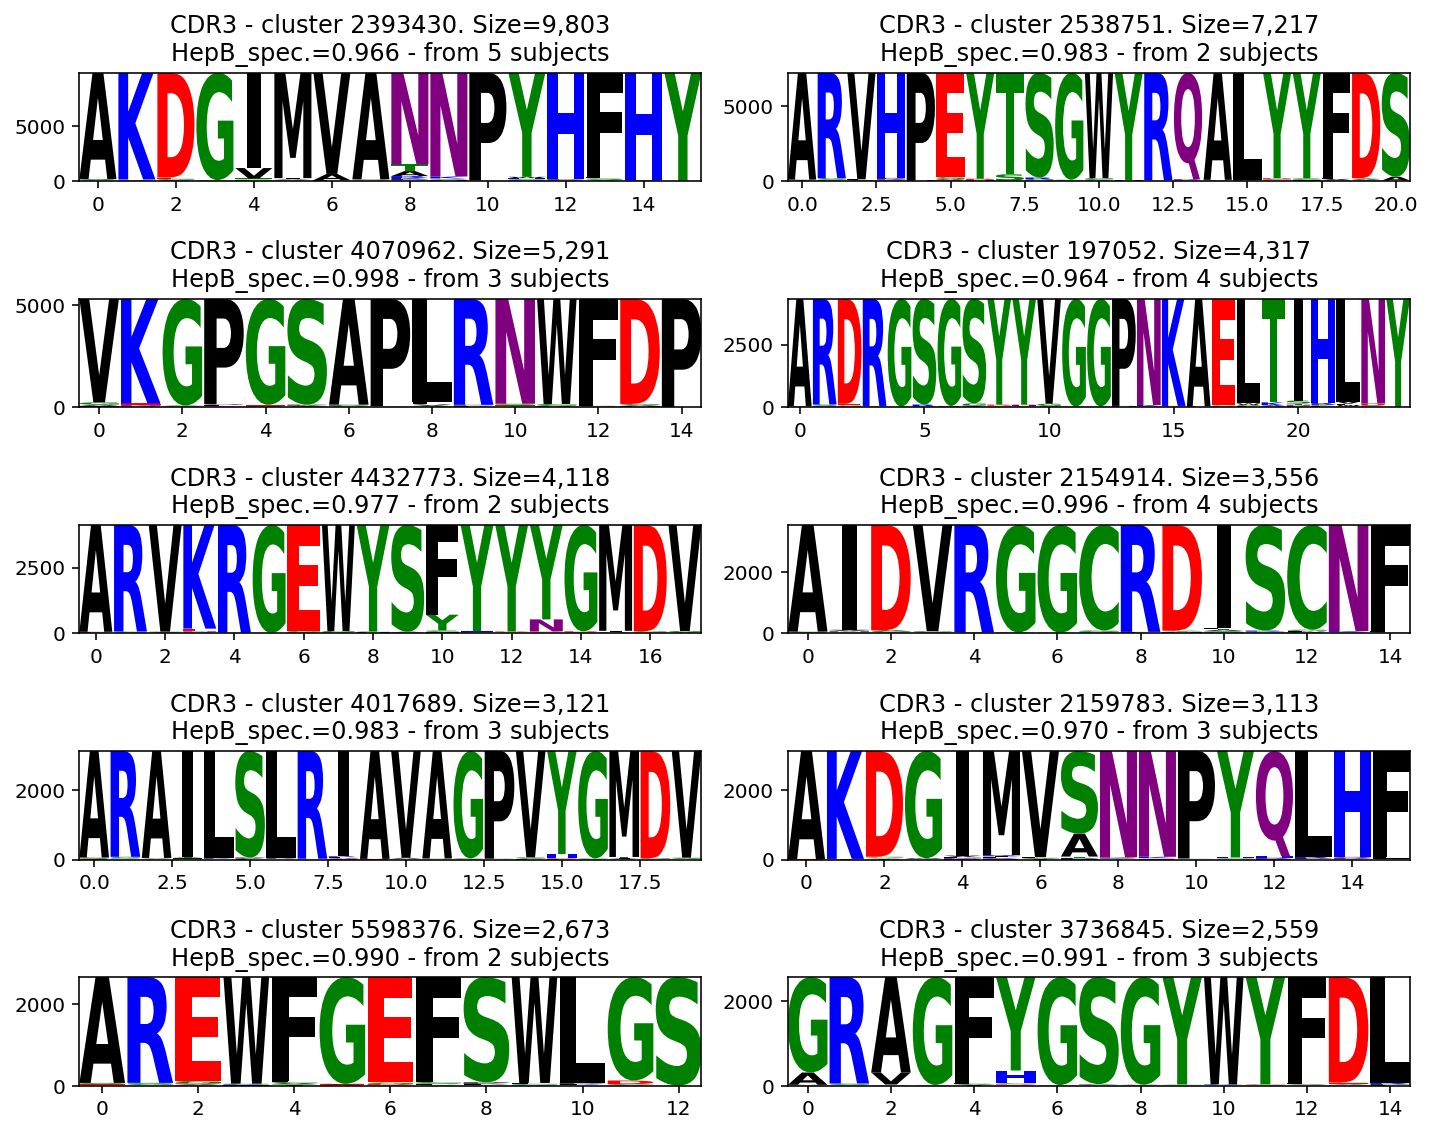

In [26]:
cdr3_logos(best_hepb_clusters.index)